In [1]:
from mdgo.core import MdRun
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from MDAnalysis.analysis.distances import distance_array
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

In [2]:
df_5_nopcm = MdRun("/Users/th/Downloads/os3_project/sila_phase2/df1s3mn/df_5_nopcm/df_5_nopcm.data",
                   "/Users/th/Downloads/os3_project/sila_phase2/df1s3mn/df_5_nopcm/df_5_nopcm_nvt.dcd",
                   "/Users/th/Downloads/os3_project/sila_phase2/df1s3mn/df_5_nopcm/df_5_nopcm_unwrapped_nvt.dcd",
                   800, 10, "df1s3mn 5% nopcm", 
                   {"cation": "type 32", "anion": "type 30", "anion-F": "type 31", "EC": "type 2",
                    "DEC": "type 8", "EMC": "type 22", "os3": "type 33", "solvent":"type 2 or type 8 or type 22"})

df_5_pcm = MdRun("/Users/th/Downloads/os3_project/sila_phase2/df1s3mn/df_5_pcm/df_5_pcm.data",
                 "/Users/th/Downloads/os3_project/sila_phase2/df1s3mn/df_5_pcm/df_5_pcm_nvt.dcd",
                 "/Users/th/Downloads/os3_project/sila_phase2/df1s3mn/df_5_pcm/df_5_pcm_unwrapped_nvt.dcd",
                 800, 10, "df1s3mn 5% pcm", 
                 {"cation": "type 32", "anion": "type 30", "anion-F": "type 31", "EC": "type 2",
                  "DEC": "type 8", "EMC": "type 22", "os3": "type 33", "solvent": "type 2 or type 8 or type 22"})

/Users/th/Documents/mdgo/mdgo/core.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


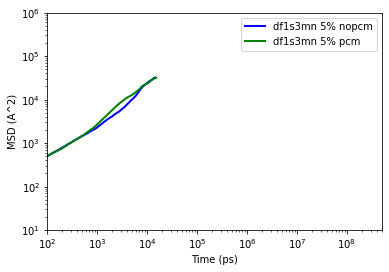

In [5]:
# start and end of fitting region selection (linear regime)
start = int(100/10)
end = int(15000/10)
df_5_nopcm.plot_cond_array(start, end, df_5_pcm)

In [6]:
df_5_nopcm.get_conductivity(start, end)

Conductivity of df1s3mn 5% nopcm: 0.9990149075796146 ± 0.0022800480602512226 mS/cm


In [7]:
df_5_pcm.get_conductivity(start, end)

Conductivity of df1s3mn 5% pcm: 0.9012013509744091 ± 0.0021526628074341847 mS/cm


In [8]:
run_start = int(1000/10)
run_end = int(25000/10)

In [9]:
df_5_nopcm.rdf_integral(["anion", "anion-F", "EC", "DEC", "EMC", "os3"],
                        {"anion": 5, "anion-F": 3, "EC": 3, "DEC": 3, "EMC": 3, "os3": 3},
                        run_start, run_end)

,species in first solvation shell,df1s3mn 5% nopcm
0,anion,0.724710
1,anion-F,0.893649
2,EC,2.160914
3,DEC,1.141293
4,EMC,1.367043
5,os3,0.034106


In [10]:
df_5_pcm.rdf_integral(["anion", "anion-F", "EC", "DEC", "EMC", "os3"],
                      {"anion": 5, "anion-F": 3, "EC": 3, "DEC": 3, "EMC": 3, "os3": 3},
                      run_start, run_end)

,species in first solvation shell,df1s3mn 5% pcm
0,anion,0.667876
1,anion-F,0.805718
2,EC,2.140687
3,DEC,1.162083
4,EMC,1.267290
5,os3,0.202534


In [11]:
df_5_nopcm.coordination_one_species("os3", 3, run_start, run_end)


,Num of os3 within 3 Å,Percentage
0,0,96.6675%
1,1,3.2543%
2,2,0.0782%


In [12]:
df_5_pcm.coordination_one_species("os3", 3, run_start, run_end)

,Num of os3 within 3 Å,Percentage
0,0,81.1080%
1,1,17.5477%
2,2,1.3270%
3,3,0.0172%


In [13]:
df_5_nopcm.shell_simple("anion", 5, run_start, run_end)

,solvation structure,Percentage
0,ssip,44.2425%
1,cip,27.5741%
2,agg,28.1833%


In [14]:
df_5_pcm.shell_simple("anion", 5, run_start, run_end)

,solvation structure,Percentage
0,ssip,46.4310%
1,cip,34.2233%
2,agg,19.3457%
